# 180. 영화평 Text 분류 - Sentiment Analysis

- IMDB (Internet Movie Database, https://www.imdb.com/)  Dataset


- 각 25,000 개의 training/testing set 으로 구성된 IMDB 영화관람평  


- “imdb_reviews” – encoding 되어있지 않은 string 형태의 data  


- label : positive, negative binary classification

## imbd_reviews (string data) 이용 감성 (이진) 분류

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset, info = tfds.load('imdb_reviews', with_info=True,as_supervised=True)

train_dataset, test_dataset = dataset['train'], dataset['test']

### tfds 는 tf.Tensor 반환

In [3]:
for input, label in dataset['test']:
    print(label)
    print()
    print(input)
    break

tf.Tensor(1, shape=(), dtype=int64)

tf.Tensor(b"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come.", shape=(),

## keras.preprocessing module 을 이용하여 tokenize 및 padding
- keras.preprocessing.text.Tokenizer  

- keras.preprocessing.sequence.pad_sequence

In [4]:
train_sentences = []
train_labels = []

test_sentences = []
test_labels = []

In [5]:
for sent, label in train_dataset:
    train_sentences.append(sent.numpy().decode('utf-8'))
    train_labels.append(label.numpy())

In [6]:
print(train_labels[-1])
print(train_sentences[-1])

1
First of all, Riget is wonderful. Good comedy and mystery thriller at the same time. Nice combination of strange 'dogma' style of telling the story together with good music and great actors. But unfortunately there's no 'the end'. As for me it's unacceptable. I was thinking... how it will be possible to continue the story without Helmer and Drusse? ...and I have some idea. I think Lars should make RIGET III a little bit different. I'm sure that 3rd part without Helmer wouldn't be the same. So here's my suggestion. Mayble little bit stupid, maybe not. I know that Lars likes to experiment. So why not to make small experiment with Riget3? I think the only solution here is to create puppet-driven animation (like for example "team America" by Trey Parker) or even computer 3d animation. I know it's not the same as real actors, but in principle I believe it could work... only this way it's possible to make actors alive again. For Riget fans this shouldn't be so big difference - if the anima

In [7]:
for sent, label in test_dataset:
    test_sentences.append(sent.numpy().decode('utf-8'))
    test_labels.append(label.numpy())

In [8]:
print(test_labels[-1])
print(test_sentences[-1])

1
They just don't make cartoons like they used to. This one had wit, great characters, and the greatest ensemble of voice over artists ever assembled for a daytime cartoon show. This still remains as one of the highest rated daytime cartoon shows, and one of the most honored, winning several Emmy Awards.


## train_labels, test_labels 를 Python list 에서 numpy array 로 변환

In [9]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

print(train_labels.shape)
print(test_labels.shape)

(25000,)
(25000,)


## train_sentences, test_sentences text 를 sequence 로 변환 

In [10]:
vocab_size = 10000

tokenizer = Tokenizer(num_words = vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(train_sentences)

In [11]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)

In [12]:
print(train_sequences[0])

[12, 14, 33, 425, 392, 18, 90, 28, 1, 9, 32, 1366, 3585, 40, 486, 1, 197, 24, 85, 154, 19, 12, 213, 329, 28, 66, 247, 215, 9, 477, 58, 66, 85, 114, 98, 22, 5675, 12, 1322, 643, 767, 12, 18, 7, 33, 400, 8170, 176, 2455, 416, 2, 89, 1231, 137, 69, 146, 52, 2, 1, 7577, 69, 229, 66, 2933, 16, 1, 2904, 1, 1, 1479, 4940, 3, 39, 3900, 117, 1584, 17, 3585, 14, 162, 19, 4, 1231, 917, 7917, 9, 4, 18, 13, 14, 4139, 5, 99, 145, 1214, 11, 242, 683, 13, 48, 24, 100, 38, 12, 7181, 5515, 38, 1366, 1, 50, 401, 11, 98, 1197, 867, 141, 10]


maximun length : 2493
average length : 237.71364


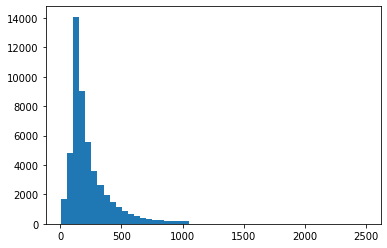

In [13]:
import matplotlib.pyplot as plt

plt.hist([len(s) for s in train_sequences] + [len(s) for s in test_sequences], bins=50)

print('maximun length : {}'.format(max(len(l) for l in train_sequences)))
print('average length : {}'.format(sum(map(len, train_sequences))/len(train_sequences)))

In [14]:
np.unique(train_labels, return_counts=True)

(array([0, 1]), array([12500, 12500]))

In [15]:
max_length = 300

train_padded = pad_sequences(train_sequences,maxlen=max_length, truncating='post', padding='post')


test_padded = pad_sequences(test_sequences,maxlen=max_length, truncating='post', padding='post')

In [16]:
print(train_padded.shape)
print(test_padded.shape)
print(train_padded[0])

(25000, 300)
(25000, 300)
[  12   14   33  425  392   18   90   28    1    9   32 1366 3585   40
  486    1  197   24   85  154   19   12  213  329   28   66  247  215
    9  477   58   66   85  114   98   22 5675   12 1322  643  767   12
   18    7   33  400 8170  176 2455  416    2   89 1231  137   69  146
   52    2    1 7577   69  229   66 2933   16    1 2904    1    1 1479
 4940    3   39 3900  117 1584   17 3585   14  162   19    4 1231  917
 7917    9    4   18   13   14 4139    5   99  145 1214   11  242  683
   13   48   24  100   38   12 7181 5515   38 1366    1   50  401   11
   98 1197  867  141   10    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0 

## sequence data 를 sentence 로 reverse conversion

In [17]:
text = train_padded[0]
print(' '.join([tokenizer.index_word.get(i, '<pad>') for i in text]))
print()
print(train_sentences[0])

this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining actor's like christopher <OOV> good name i could barely sit through it <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad

## model define

In [18]:
model = Sequential([
    Embedding(vocab_size, 100),
    Bidirectional(tf.keras.layers.LSTM(64)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               84480     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,092,801
Trainable params: 1,092,801
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               84480     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,092,801
Trainable params: 1,092,801
Non-trainable params: 0
_________________________________________________________________


In [20]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [21]:
import time
s = time.time()

num_epochs = 30
history = model.fit(train_padded, train_labels, epochs=num_epochs, batch_size=128,
          validation_data=(test_padded, test_labels), verbose=1, callbacks=[early_stop])

print(time.time() - s)

Epoch 1/30
196/196 [==============================] - 12s 62ms/step - loss: 0.4436 - accuracy: 0.7830 - val_loss: 0.3634 - val_accuracy: 0.8444
Epoch 2/30
196/196 [==============================] - 11s 59ms/step - loss: 0.2470 - accuracy: 0.9077 - val_loss: 0.3335 - val_accuracy: 0.8664
Epoch 3/30
196/196 [==============================] - 12s 59ms/step - loss: 0.1839 - accuracy: 0.9346 - val_loss: 0.3520 - val_accuracy: 0.8483
Epoch 4/30
196/196 [==============================] - 12s 59ms/step - loss: 0.1431 - accuracy: 0.9509 - val_loss: 0.4105 - val_accuracy: 0.8479
Epoch 5/30
196/196 [==============================] - 11s 58ms/step - loss: 0.1247 - accuracy: 0.9575 - val_loss: 0.4829 - val_accuracy: 0.8453
Epoch 6/30
196/196 [==============================] - 11s 58ms/step - loss: 0.1110 - accuracy: 0.9603 - val_loss: 0.5667 - val_accuracy: 0.8338
Epoch 7/30
196/196 [==============================] - 12s 59ms/step - loss: 0.0698 - accuracy: 0.9771 - val_loss: 0.6257 - val_accuracy:

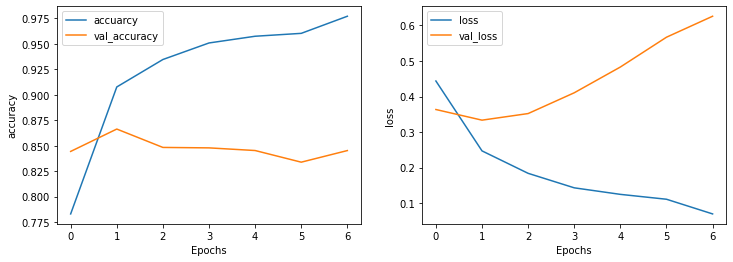

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_xlabel('Epochs')
ax1.set_ylabel('accuracy')
ax1.legend(['accuarcy', 'val_accuracy'])

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_xlabel('Epochs')
ax2.set_ylabel('loss')
ax2.legend(['loss', 'val_loss'])
plt.show()

In [33]:
sample_text = ['The movei was terrible. I would not recommend the movie']
#sample_text = ['The movei was fantastic. I would recommend the movie']
#sample_text = ['The animation and graphics were out of this world']
sample_seq = tokenizer.texts_to_sequences(sample_text)
sample_padded = pad_sequences(sample_seq, maxlen=max_length, padding='post', truncating='post')

In [34]:
['positive' if model.predict([sample_padded]) >= 0.5 else 'negative']

['negative']